# <div align="center"> Machine Learning </div>
# <div align="center"> HomeWork # 1 </div>
## <div align="center"> Amin Asadi </div>

In [1]:
import numpy as np

x = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
y = [40, 41, 43, 42, 44, 42, 43, 42]

xmean = np.mean(x)
ymean = np.mean(y)

varx = np.var(x, ddof=1)

vary = np.var(y, ddof=1)

X = np.stack((x,y), axis=0)
b1 = np.cov(X, ddof=1)[0][1] / varx
b0 = ymean - b1 * xmean
b0, b1

(40.892857142857146, 0.5476190476190476)

In [2]:
from PIL import Image, ImageColor
from sklearn.metrics import confusion_matrix, classification_report
import os
path = './HW1_Q6_Dataset/Q6_Dataset/Images/'

In [3]:
samples = os.listdir(path)

In [4]:
def classifier(s):
    img = Image.open(os.path.join(path, s))
    img = np.array(img)    
    mean_red = np.mean(img[:, :, 0])
    mean_blue = np.mean(img[:, :, 2])
    if mean_red > mean_blue:
        return 'm'
    else:
        return 'c'

In [5]:
y_true = []
y_pred = []

for i, s in enumerate(samples):
    y_true.append(s[0])
    y_pred.append(classifier(s))

In [6]:
confusion_mtx = confusion_matrix(y_true, y_pred)
confusion_mtx

array([[46, 18],
       [ 1, 57]])

In [13]:
true_manunited = confusion_mtx[0][0]
false_manunited = confusion_mtx[0][1]
false_chelsea = confusion_mtx[1][0]
true_chelsea = confusion_mtx[1][1]

In [16]:
accuracy = (np.sum(np.diag(confusion_mtx)))/(np.sum(confusion_mtx))
accuracy

0.8442622950819673

In [9]:
print(classification_report(y_true, y_pred, target_names=['chelsi', 'manu']))

              precision    recall  f1-score   support

      chelsi       0.98      0.72      0.83        64
        manu       0.76      0.98      0.86        58

    accuracy                           0.84       122
   macro avg       0.87      0.85      0.84       122
weighted avg       0.87      0.84      0.84       122



In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
m = 100
x = np.linspace(0, 2, 100)
x = x.reshape(m, 1)
y = np.cos(2 * np.pi * x) + np.random.randn(100, 1)
y = y.reshape(m, 1)

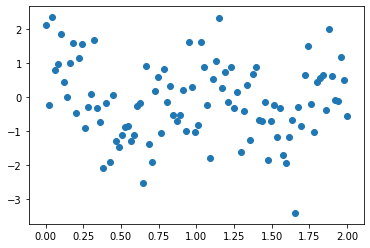

In [107]:
plt.scatter(x, y)

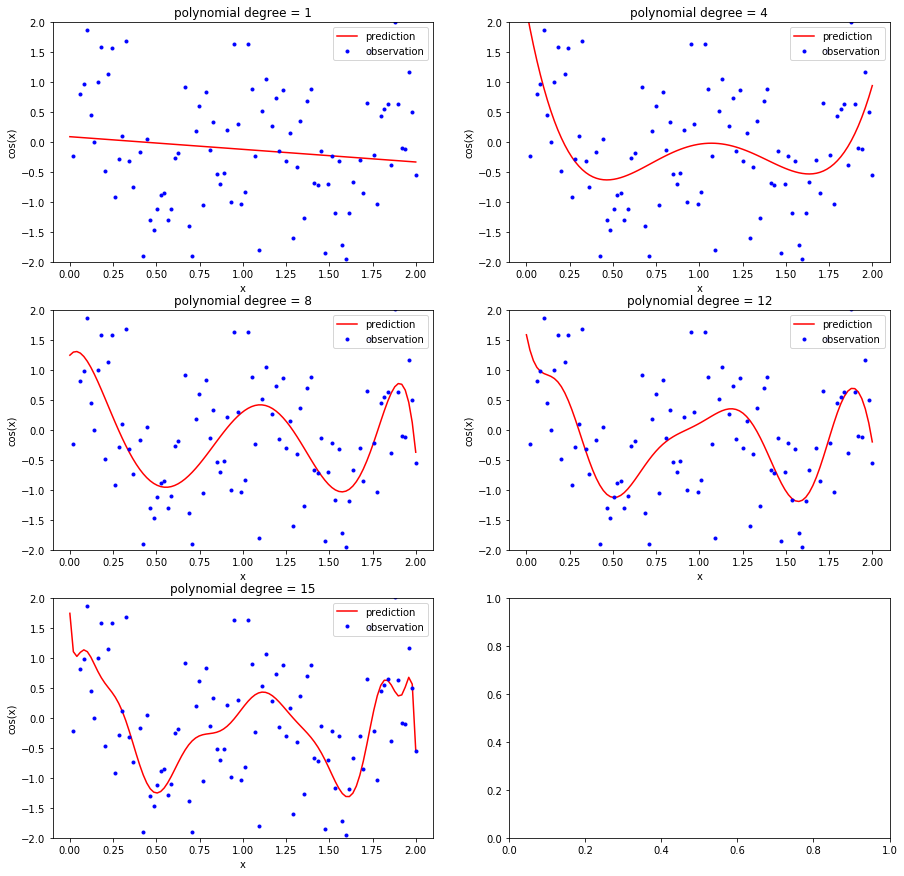

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = [1, 4, 8, 12, 15]
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs = axs.flatten()
for i, deg in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_features.fit_transform(x)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    b, w = lin_reg.intercept_, lin_reg.coef_
    y_fitted = np.dot(X_poly, w.T) + b
    
    axs[i].plot(x, y_fitted, 'r-', label='prediction')
    axs[i].plot(x, y, 'b.', label='observation')
    axs[i].set_ylim(-2, 2)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('cos(x)')
    axs[i].set_title('polynomial degree = ' + str(deg))
    axs[i].legend()